Multivariate Linear Regression is not Multiple Linear Regression since it refer to another things

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Linear Regression Algorithms

In [34]:
class LinearRegression:
    def __init__(self, alpha=0.001, iteration=100000):
        self.alpha = alpha
        self.iteration = iteration
        
    
    def _normalize(self, x):
        for i in range(self.n):
            x[:, i] = x[:, i] / max(x[:, i])
        return x
        
    
    def _compute_prediction(self):
        self.y_hat = np.dot(self.x, self.w) + self.b
        return self.y_hat
        
    
    def _compute_cost(self):
        self.cost = 1 / (2 * self.m) * np.sum((self._compute_prediction() - self.y) ** 2)
        return self.cost
    
    
    def _compute_gradient(self):
        self.d_dw = 1 / self.m * np.dot(self.x.T, self._compute_prediction() - self.y)
        self.d_db = 1 / self.m * np.sum((self._compute_prediction() - self.y))
        return self.d_dw, self.d_db
        
    
    def _gradient_descend(self):
        self.cost_hist = []
        
        for i in range(self.iteration):
            self._compute_prediction()
            self.cost_hist.append(self._compute_cost())
            
            if i % math.ceil(self.iteration / 10) == 0 or i + 1 == self.iteration:
                print(f"Iteration: {i}, Cost: {self.cost:.5f}, W: {[round(j, 3) for j in self.w]}, b: {self.b:.2f}")
                
            self._compute_gradient()
            
            self.w = self.w - self.alpha * self.d_dw
            self.b = self.b - self.alpha * self.d_db
            
            
    def _check_dimension(self, x):
        try:
            if x.shape[1]:
                pass
        except IndexError:
            raise ValueError('Expected 2D aray, got 1D instead')
                    
        
    def fit(self, x, y):    
        self._check_dimension(x)
        self.x = x
        self.y = y
        self.m = self.x.shape[0]
        self.n = self.x.shape[1]    
        self.w = np.ones(self.n)
        self.b = 0
        
        self._normalize(self.x)
        self._gradient_descend()
        
    
    def predict(self, x_test):    
        self._check_dimension(x_test)
        self._normalize(x_test)
        return np.dot(x_test, self.w) + self.b
    
    
    def accuracy(self, y_test, y_pred):
        rss = np.sum((y_test - y_pred) ** 2)
        tss = np.sum((y_test - np.mean(y_test)) ** 2)
        
        r_squared = 1 - (rss / tss)
        return r_squared
        

### Test 1

In [35]:
df = pd.read_csv('./data/data.csv', delimiter=',', header=None)
x_train, y_train = df.iloc[:80, 0].values.reshape(-1, 1), df.iloc[:80, 1].values
x_test, y_test =  df.iloc[80:, 0].values.reshape(-1, 1), df.iloc[80:, 1].values


model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nAccuracy: ", model.accuracy(y_test, y_pred))

Iteration: 0, Cost: 2636.44711, W: [1.0], b: 0.00
Iteration: 10000, Cost: 84.01584, W: [41.598], b: 43.01
Iteration: 20000, Cost: 78.28079, W: [47.794], b: 38.66
Iteration: 30000, Cost: 73.77243, W: [53.288], b: 34.81
Iteration: 40000, Cost: 70.22838, W: [58.158], b: 31.39
Iteration: 50000, Cost: 67.44237, W: [62.477], b: 28.36
Iteration: 60000, Cost: 65.25227, W: [66.305], b: 25.67
Iteration: 70000, Cost: 63.53061, W: [69.7], b: 23.29
Iteration: 80000, Cost: 62.17720, W: [72.71], b: 21.18
Iteration: 90000, Cost: 61.11328, W: [75.379], b: 19.31
Iteration: 99999, Cost: 60.27700, W: [77.745], b: 17.65

Accuracy:  0.6139290505712456


### Test 2

In [36]:
features = ['size', 'bedroom', 'floor', 'age', 'price']
df = pd.read_csv('./data/houses.txt', names=features)
df.drop(['floor'], axis=1, inplace=True)
df.head()

,size,bedroom,age,price
0,952.0,2.0,65.0,271.5
1,1244.0,3.0,64.0,300.0
2,1947.0,3.0,17.0,509.8
3,1725.0,3.0,42.0,394.0
4,1959.0,3.0,15.0,540.0


In [37]:
x, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

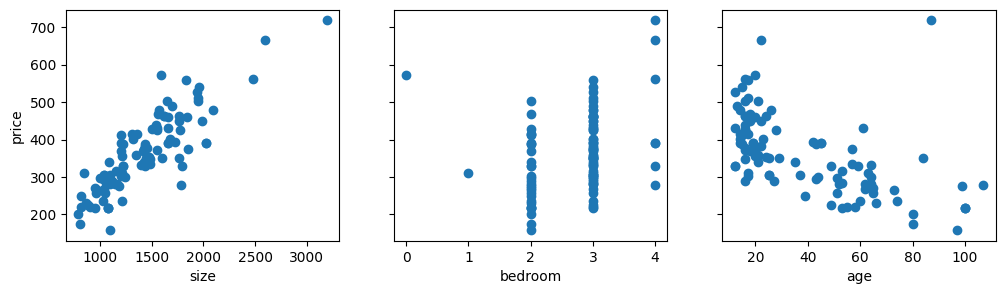

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:, i], y)
    ax[i].set_xlabel(df.columns[i])
    
ax[0].set_ylabel(features[-1])
plt.show()

In [39]:
ratio = 0.8
np.random.seed(42)
mask = np.random.rand(len(x)) < ratio

x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

Iteration: 0, Cost: 71000.02738, W: [1.0, 1.0, 1.0], b: 0.00
Iteration: 10000, Cost: 3034.79362, W: [172.743, 137.833, -44.888], b: 207.05
Iteration: 20000, Cost: 2182.29695, W: [234.522, 125.418, -111.036], b: 212.07
Iteration: 30000, Cost: 1773.84182, W: [283.919, 108.304, -146.994], b: 214.87
Iteration: 40000, Cost: 1530.91798, W: [325.133, 89.42, -165.829], b: 216.31
Iteration: 50000, Cost: 1359.37557, W: [360.644, 70.349, -175.0], b: 216.91
Iteration: 60000, Cost: 1225.72926, W: [391.947, 51.913, -178.762], b: 216.97
Iteration: 70000, Cost: 1116.72871, W: [419.97, 34.511, -179.538], b: 216.71
Iteration: 80000, Cost: 1026.09880, W: [445.309, 18.307, -178.707], b: 216.23
Iteration: 90000, Cost: 950.15323, W: [468.368, 3.336, -177.051], b: 215.62
Iteration: 99999, Cost: 886.31840, W: [489.433, -10.43, -175.01], b: 214.93


In [41]:
y_pred = model.predict(x_test)
print("\nAccuracy", model.accuracy(y_test, y_pred))


Accuracy 0.7067529316554351


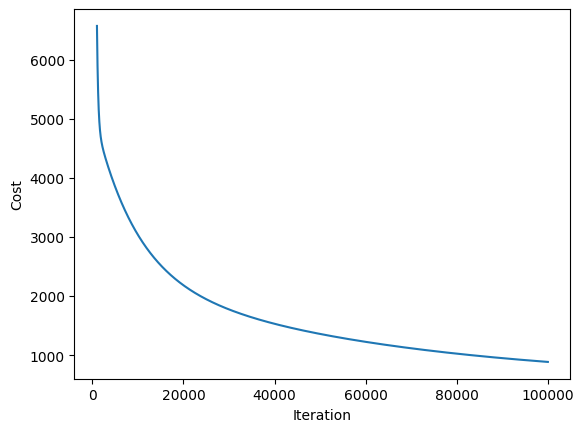

In [42]:
plt.plot(1000 + np.arange(len(model.cost_hist[1000:])), model.cost_hist[1000:]) 
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression().fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

model_2.score(x_test, y_test)

0.3181291920334366